# Probability and distributions
Concerns the study of uncertainty. Probability can be thought of as the fraction of times an event occurs, or as a degree of belief about an event.

Quantyfing uncertainty requires the idea of a random variable, which is a function that maps outcomes of random experiments to a set of properties that we are interested in.

Using the mathematical structure of probability, the goal is to perform _automated reasoning_, and in this sense, probability generalizes logical reasoning.

A triplet ($\Omega,A,P$)$\rightarrow$(sample space, event space, probability), the probability of a single event must line in $[0,1]$, and the total probability over all outcomes in the sample space $\Omega$ must be 1.

## Continuous and Discrete distributions

### Definition 6.1 (PDF). A function $f:\mathbb{R}^D\rightarrow \mathbb{R}$
If (i wont make vector as $\mathbf{x}$ but $x$ so $x=[x_0,x_1,...,x_i]$)
1. $\forall X\in \mathbb{R}^D:f(x)\ge0$
2. Its integral exists and $$\int_{\mathbb{R}^D}f(x)dx=1$$
where $a,b\in\mathbb{R}$ and $x\in\mathbb{R}$ are outcomes of the continuous random variable $X$. States $x\in\mathbb{R}^D$ are defined by consdiering a vector of $x\in\mathbb{R}$ 
The PDF is any function $f$ that is non-negative and integrates to one. We associate a random variable $X$ with this function $f$ by $$P(a\le X\le b)=\int_a^bf(x)dx$$
where $a,b\in\mathbb{R}$ and $x\in\mathbb{R}$ 

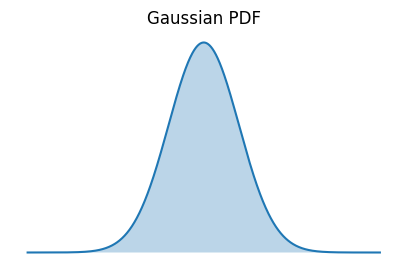

Sum of PDF values: 99.8999
Integral approximation: 1.0000


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt 

def plot(x, values, title: str = ''):
    plt.figure(figsize=(5,3))
    plt.title(title)
    if torch.all(x == x.int()):
        plt.stem(x.numpy(), values.numpy(), basefmt="", use_line_collection=True)
    else: 
        plt.plot(values.numpy())
        plt.fill_between(range(len(values)), values.numpy(), alpha=0.3)
    plt.fill_between
    plt.axis(False)
    plt.show()


def gaussian_pdf(x, mu, sigma):
    """Compute PDF of a Gaussian distribution."""
    return (1 / (sigma * np.sqrt(2 * np.pi))) * torch.exp(-0.5 * ((x - mu) / sigma)**2)

x = torch.linspace(-5, 5, 1000)  # Range of values
mu, sigma = 0.0, 1.0
pdf_values = gaussian_pdf(x, mu, sigma)
plot(x=x, values=pdf_values, title='Gaussian PDF')
print(f"Sum of PDF values: {pdf_values.sum().item():.4f}")
print(f"Integral approximation: {(pdf_values * (x[1]-x[0])).sum().item():.4f}")

### (CDF) Of a multivariate real-values random variable.
Is given by $$F_X(x)=P(X_1\le x_1,...,X_D\le x_D)$$
where $X=[X_1,...,X_D]^T$, and $x=[x_1,...,x_D]^T$, and the right-hand side represents the probability that a random variable $X_i$ takes the value smaller than or equal to $x_i$. The CDF can be expressed as the integral of the PDF $f(x)$ so that $$F_X(x)=\int_{-\infty}^{x_1}\dots\int_{\infty}^{x_D}f(z_1,...,z_D)dz_1...dz_D$$
There are in fact two distinct concepts when talking about distributions. PDF which is a nonnegative function that sums to one.

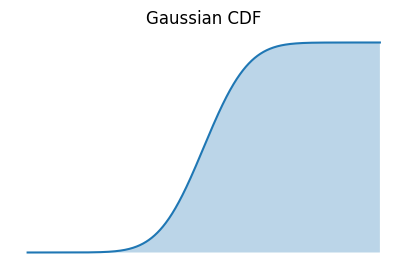

In [56]:
def gaussian_cdf(x, mu, sigma, x_min=-5, n_points=1000):
    """Numerically compute CDF by integrating PDF"""
    x_grid = torch.linspace(x_min, x, n_points)
    pdf = (1/(sigma*np.sqrt(2*np.pi))) * torch.exp(-0.5*((x_grid-mu)/sigma)**2)
    dx = x_grid[1] - x_grid[0]
    return torch.sum(pdf * dx)

vmap_cdf = torch.vmap(lambda x: gaussian_cdf(x, mu, sigma))
cdf_values = vmap_cdf(x)
plot(x, cdf_values, 'Gaussian CDF')

### Baye's Theorem
$$p(x|y)=\frac{p(y|x)p(x)}{p(y)}$$
From the product rule $p(x,y)=p(x|y)p(y)$ and $p(x,y)=p(y|x)p(x)$ so that $$p(x|y)p(y)=p(y|x)p(x)$$
Where $p(x)$ is the prior which encapsulates or subjective prior knowledge of the unobserved (latent) variable $x$ before observing any data.

In [58]:
import torch # Example from Bishop (2024)
px = torch.tensor(0.01)     # Prior
py_given_x = 0.99           # Likelihood
py_given_notx = torch.tensor(0.05) # False Positive Rate
# Marginal P(B)
p_notx = 1 - px
py = py_given_x * px + py_given_notx * p_notx
# Posterior P(A|B)
px_given_y = (py_given_x * px) / py
print(f"Posterior: {px_given_y.item()}")

Posterior: 0.1666666716337204


### Definition 6.3 (Expected Value).Expected value of a function $g:\mathbb{R}\rightarrow \mathbb{R}$ of a univariate continuous random variable $X\sim p(x)$
Is given by an integral and a drawn from a ditribution $p$ 
$$E_X[g(x)]=\int_{\mathcal{X}}g(x)p(x)dx$$
The expected value of a function $g$ of a discrete random variable $X\sim p(x)$ is given by $$E_X[g(x)]=\sum_{x\in\mathcal{X}}g(x)p(x)$$
where $\mathcal{X}$ is the set of all possible outcomes (target space) of the random variable $X$.


In [9]:
from torch.distributions import Normal
from torch.distributions import Poisson
import torch
import numpy as np

def g(X):
    '''Function'''
    return 2*X + 3

def _expected_value_continuous(f, p, low=-10, high=10, n_points=1000):
    '''Expected value of a continuous function'''
    X = torch.linspace(low, high, n_points)
    prob = torch.exp(p.log_prob(X)) # PDF Values
    integrand = f(X) * prob
    return torch.trapezoid(integrand, X)

def _expected_value_discrete(f, p, x_max=20):
    X = torch.arange(0, x_max+1)
    prob = torch.exp(p.log_prob(X))
    return torch.sum(f(X) * prob)

p = Normal(0, 1)
print("E[g(X)] (continuous):    ", _expected_value_continuous(g, p).item())
p_discrete = Poisson(rate=2.0)  # Poisson with lamda=2
print("E[g(X)] (discrete):      ", _expected_value_discrete(g, p_discrete).item())


E[g(X)] (continuous):     3.000000238418579
E[g(X)] (discrete):       7.0


### Definition 6.4. (Mean). The mean of a random variable X with staes $x\in\mathbb{R}^D$ 
Is an average and is defined as 
$$E_X[x]=\begin{bmatrix}\mathbb{E}_{X_1}[x_1]\\\vdots\\ E_{X_D}[X_D]\end{bmatrix}\in\mathbb{R}^D$$
where $\mathbb{E}_{X_d}[x_d]:=\int_{\mathcal{X}}x_dp(x_d)dx_d$ if X is a continuous random variable

In [167]:
omega = torch.tensor([0.,1.,1.,0.,2.])

def continuous_mean(pdf_func, low=-1, high=3, n_points=1000):
    """Compute mean of continuous random variable"""
    x = torch.linspace(low, high, n_points)
    p = pdf_func(x)  # PDF values
    return torch.trapezoid(x * p, x)  # E[X] = ∫x*p(x)dx

def normal_pdf(x):
    return torch.exp(Normal(0, 1).log_prob(x))

print("Continuous mean:", continuous_mean(normal_pdf))  # Should be ≈0

def discrete_mean(values):
    """Compute mean of discrete random variable"""
    unique_values, counts = torch.unique(values, return_counts=True)
    probabilities = counts.float() / counts.sum()
    return (unique_values * probabilities).sum()

print("Discrete mean:", discrete_mean(omega))  # Should be ≈0
print("     (Built in):", {omega.mean()})

Continuous mean: tensor(0.2375)
Discrete mean: tensor(0.8000)
     (Built in): {tensor(0.8000)}


### Definition 6.5 (Covariance, Univariate). Between t2o random variables $X,Y\in\mathbb{R}$ 
Is given by the expected product of their deviations from their respectie means i.e., $$Cov_{X,Y}[x,y]:=\mathbb{E}_{X,Y}[(x-EX[x])(y-EY[y])]$$
By using linearity of expectations can be rewritten as $$Cov[x,y]=E[x,y]-E[x]E[y]$$
The covariance of a variable with itself is called the variance and denoted by V[x]. The square root is the standard deviation.

In [217]:
def expected_product(X, Y, independent=False):
    """Generalized E[XY] calculator."""
    if independent:
        return X.mean() * Y.mean()
    else:
        assert len(X) == len(Y), "For dependent case, X and Y must be paired"
        return (X * Y).mean()
    
X = torch.tensor([1., 2., 3.])
Y = torch.tensor([4., 5., 6.])
print("E[XY] - dependent (discrete):", expected_product(X,Y)) # If they are dependent
print("E[XY] - independent (discrete):", expected_product(X, Y, independent=True))

def covariance(X, Y):
    EXY = expected_product(X, Y, False)   # Dependent
    EX = X.mean()
    EY = Y.mean()
    return EXY - EX * EY

print("Cov[XY]: ", covariance(X,Y))

E[XY] - dependent (discrete): tensor(10.6667)
E[XY] - independent (discrete): tensor(10.)
Cov[XY]:  tensor(0.6667)


### Definition 6.7 (Variance). The variance of a random variable X with states $x\in\mathbb{R}^D$ and a mean vector $\mu\in\mathbb{R}^D$ 
$$\begin{aligned}Var[x]&=Cov[x,x]\\ &=EX[(x-\mu)(x-\mu)^T=EX[xx^T]-EX[x]EX[x]^T \end{aligned} $$ 

In [218]:
def variance(X):
    return covariance(X,X) #-> expected_product(X,X.T) - X.mean()*X.mean().T
print("Var[X]: ", variance(X))

Var[X]:  tensor(0.6667)


### Definition 6.8 (Correlation) between tro random variables


In [219]:
def correlation(X,Y):
    return covariance(X,Y)/torch.sqrt(variance(X)*variance(Y))
print("corr[x,y]: ",correlation(X,Y))

corr[x,y]:  tensor(1.0000)


### Definition 6.9 (Empirical Mean and Covariance). Empricial mean vector is the arithmetic average of the obervations
$$\bar{x}:=\frac{1}{N}\sum_i^Nx_n$$
where $x_n\in\mathbb{R}^D$, similar to the empirical mean, the empirical covariance matrix is a $D\times D$ matrix.
$$\Sigma:=\frac{1}{N}\sum_1^N(x_n-\bar{x})(x_n-\bar{x})^T$$

In [285]:
def empirical_mean(X):
    return torch.mean(X)

def empirical_cov(X):
    if X.dim() == 1: 
        return variance(X) # Unbiased
    elif X.dim() == 2:
        X_centered = X - X.mean(dim=0)
        return (X_centered @ X_centered.T) / X.size(0)
X_vec = torch.tensor([1., 2., 3.])
X_mat = torch.randn(3, 3)  # 3 samples, 3 features

print("Vector mean:", empirical_mean(X_vec))
print("Vector cov:", empirical_cov(X_vec))
print("\nMatrix mean:", empirical_mean(X_mat))  # Mean of all elements
print("Matrix cov:\n", empirical_cov(X_mat))  # Covariance matrix

Vector mean: tensor(2.)
Vector cov: tensor(0.6667)

Matrix mean: tensor(-0.1928)
Matrix cov:
 tensor([[ 0.8639, -0.0395, -0.8244],
        [-0.0395,  0.0945, -0.0551],
        [-0.8244, -0.0551,  0.8795]])


### Expresisons for the Variance

In [ ]:
import torch
from torch.distributions import Normal

def population_variance(pdf_func, μ=None, low=-4, high=4, n_points=1000):
    x = torch.linspace(low, high, n_points)
    p = pdf_func(x)
    if μ is None:
        μ = torch.trapezoid(x * p, x)  # Compute mean if not provided
    return torch.trapezoid((x - μ)**2 * p, x)  # Var[X] = ∫(x-μ)² p(x) dx

normal_pdf = lambda x: torch.exp(Normal(0, 1).log_prob(x))
print("Var[N(0,1)]:", population_variance(normal_pdf))  # Output: ≈1.0

Var[N(0,1)]: tensor(0.9989)


### Inner Products of RVs
For two uncorrelated variables random variables X,Y
$$V[x+y]=V[x]+V[y]$$
Which looks very much like the pythagorean theorem.

In [314]:
X = torch.tensor([1.,2.,3.])
Y = torch.tensor([4.,5.,6.])
print(correlation(X,Y))
print(variance(X+Y), variance(X)+variance(Y)) # They are correlated  

tensor(1.0000)
tensor(2.6667) tensor(1.3333)


### Conjugacy and Exponential Family
1. Closure property, when applying the rules of probability e.g., Baye's theorem. Applying a particular operation returns an object of the same type.
2. As we collect more data, we do not need more parameters to describe the distribution.
3. Since we are interested in learning from data, we want parameter estimation to behave nicely.

A class of distributions called the exponential family exponential family
provides the right balance of generality while retaining favorable compu￾tation and inference properties.

### Exercises
1. Marginal and conditional distributions

In [370]:
table = torch.tensor([ # X
                     [0.01, 0.02, 0.03, 0.1, 0.1],
                     [0.05, 0.1, 0.05, 0.07, 0.2],
                     [0.1, 0.05, 0.03, 0.05, 0.04] # Y
]) # Looks normalized so no need of */N
prob = torch.sum(table) # Must be equal to 1
# a. Marginal distributions p(x) and p(y)
px = torch.sum(table,dim=0) # sum across rows    (Y)
py = torch.sum(table,dim=1) # sum across columns (X)
# b. Conditional distributions [p(x|Y=y1) and p(y|X=x3)] are nij/rj and nij/ci 
p_x_given_y1 = table[0, :] / py[0]  # P(X|Y=y1)
p_y_given_x3 = table[:, 2] / px[2]  # P(Y|X=x3)
print("p(x):", px)
print("p(y):", py)
print("\nP(X|Y=y1):", p_x_given_y1)
print("P(Y|X=x3):", p_y_given_x3)
p_x_given_y1.sum() == p_y_given_x3.sum()

p(x): tensor([0.1600, 0.1700, 0.1100, 0.2200, 0.3400])
p(y): tensor([0.2600, 0.4700, 0.2700])

P(X|Y=y1): tensor([0.0385, 0.0769, 0.1154, 0.3846, 0.3846])
P(Y|X=x3): tensor([0.2727, 0.4545, 0.2727])


tensor(True)

The marginals are the probabilities of each random variables ($x_i, y_j$) and the conditionals are the probabilites of each random variable ($x_i,y_j$) given a fixed ($y_j, x_i$)

2. Compute a mixture of two Gaussian distributions (theorem 6.12)

a.
- Marginal for ($x_2$):
$$
  P(x_1) = 0.4 \cdot \mathcal{N}(x_1 | 10.0, 1.0) + 0.6 \cdot \mathcal{N}(x_1 | 0.0, 8.4)
$$
- Marginal for ($x_2$):
$$
  P(x_2) = 0.4 \cdot \mathcal{N}(x_2 | 2.0, 1.0) + 0.6 \cdot \mathcal{N}(x_2 | 0.0, 1.7)
$$

a. Marginal distributions:
    x1 components: [Normal(loc: 10.0, scale: 1.0), Normal(loc: 0.0, scale: 2.898275136947632)]
    x2 components: [Normal(loc: 2.0, scale: 1.0), Normal(loc: 0.0, scale: 1.3038405179977417)]

b. Marginal statistics:
    x1 - Mean: 4.00, Mode: 10.00
    x2 - Mean: 0.80, Mode: 1.34

c. 2D Distribution:
    Mean: [4.  0.8]


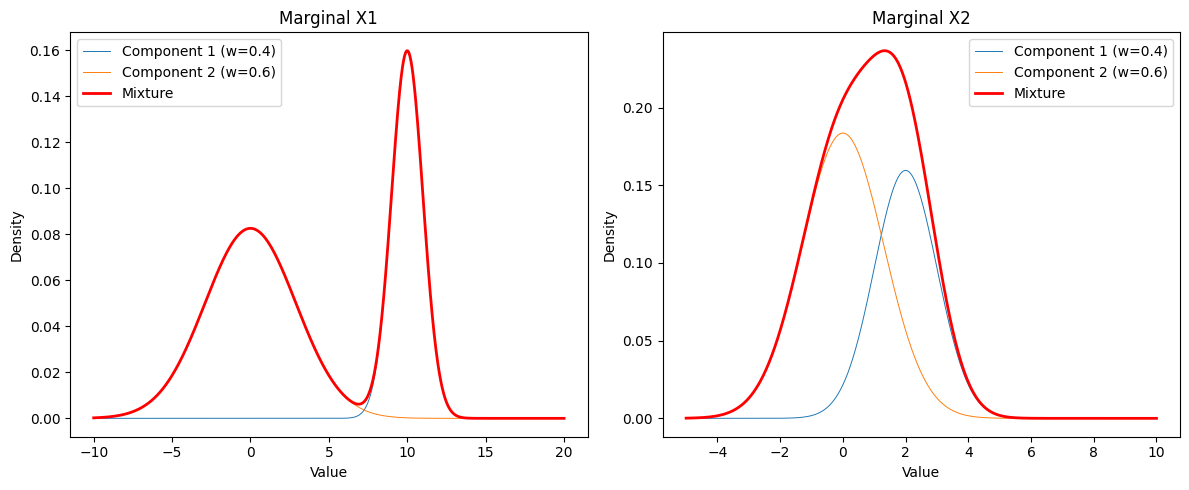

In [419]:
import torch
from torch.distributions import Normal
import matplotlib.pyplot as plt

# Parameters
mu1 = torch.tensor([10.0, 2.0])
mu2 = torch.tensor([0.0, 0.0])
S1 = torch.tensor([[1.0, 0.0], [0.0, 1.0]])
S2 = torch.tensor([[8.4, 2.0], [2.0, 1.7]])
weights = torch.tensor([0.4, 0.6])  # Mixture weights

# a. Marginal distributions
marginal_x1_components = [
    Normal(loc=mu1[0], scale=torch.sqrt(S1[0, 0])),  # N(10.0, 1.0)
    Normal(loc=mu2[0], scale=torch.sqrt(S2[0, 0]))   # N(0.0, 8.4)
]

marginal_x2_components = [
    Normal(loc=mu1[1], scale=torch.sqrt(S1[1, 1])),  # N(2.0, 1.0)
    Normal(loc=mu2[1], scale=torch.sqrt(S2[1, 1]))   # N(0.0, 1.7)
]

print("a. Marginal distributions:")
print("    x1 components:", marginal_x1_components)
print("    x2 components:", marginal_x2_components)

# b. Mean, mode, median for marginals
def compute_marginal_stats(components, weights, x_range):
    pdf = sum(w * torch.exp(d.log_prob(x_range)) for w, d in zip(weights, components))
    mean = sum(w * d.mean for w, d in zip(weights, components))
    mode = x_range[torch.argmax(pdf)]
    # For median, we'd need to compute CDF numerically
    return mean.item(), mode.item()

x1_range = torch.linspace(-10, 20, 1000)
x1_mean, x1_mode = compute_marginal_stats(marginal_x1_components, weights, x1_range)

x2_range = torch.linspace(-5, 10, 1000)
x2_mean, x2_mode = compute_marginal_stats(marginal_x2_components, weights, x2_range)

print("\nb. Marginal statistics:")
print(f"    x1 - Mean: {x1_mean:.2f}, Mode: {x1_mode:.2f}")
print(f"    x2 - Mean: {x2_mean:.2f}, Mode: {x2_mode:.2f}")

# c. 2D distribution
mean_2d = weights[0] * mu1 + weights[1] * mu2
print("\nc. 2D Distribution:")
print(f"    Mean: {mean_2d.numpy()}")

# --- Plotting ---
def plot_marginal(ax, x_range, components, weights, title):
    '''Here we approaches exponential families log p(x)'''
    pdf = sum(w * torch.exp(d.log_prob(x_range)) for w, d in zip(weights, components))
    for i, (w, d) in enumerate(zip(weights, components)):
        ax.plot(x_range, w * torch.exp(d.log_prob(x_range)), '-', lw=0.7,
               label=f'Component {i+1} (w={w:.1f})')
    ax.plot(x_range, pdf, label='Mixture', color='red', lw=2)
    ax.set_title(title)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plot_marginal(ax1, x1_range, marginal_x1_components, weights, "Marginal X1")
plot_marginal(ax2, x2_range, marginal_x2_components, weights, "Marginal X2")
plt.tight_layout()
plt.show()

3. A computer program sometimes compiles and sometimes not. We decide to model the apparent stochasticity (success vs. not success) x of the compiler using a Bernoulli distribution. Choose a conjugate prior for the Bernoulli likelihood and compute the posterior distribution.

The solution is straightforward (and is available in the book)
$$\mu^{\alpha-x-1}(1-\mu)^{\beta+(1-x)-1}\propto p(\theta|\alpha+x,\beta+(1-x))$$

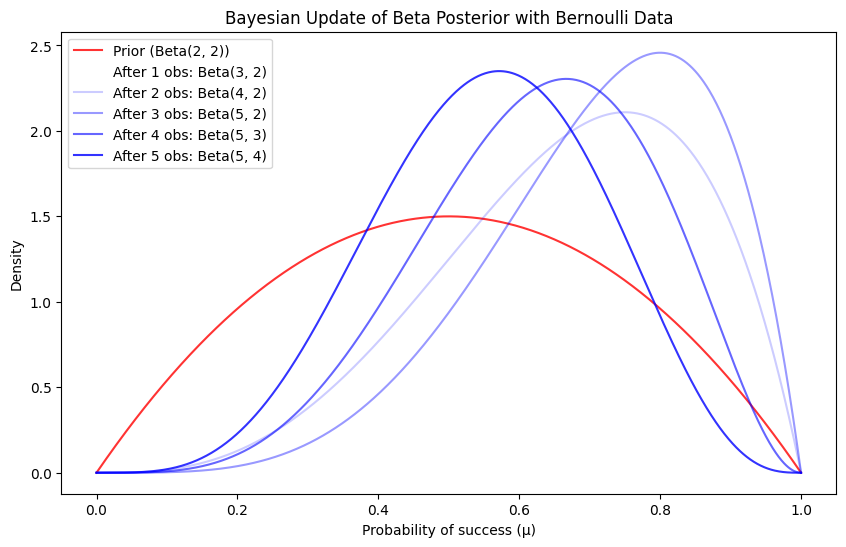

In [462]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, bernoulli

# Prior parameters (Beta distribution)
alpha_prior = 2
beta_prior = 2
data = bernoulli.rvs(0.5, size=5) # Simulate observed data
# Initialize posterior
alpha_post, beta_post = alpha_prior, beta_prior

plt.figure(figsize=(10, 6))
x = np.linspace(0, 1, 1000)

# Plot prior
plt.plot(x, beta(alpha_prior, beta_prior).pdf(x), 'r',alpha=0.8, label='Prior (Beta(2, 2))')

# Iteratively update posterior with each observation
for i, x_i in enumerate(data):
    alpha_post += x_i
    beta_post += (1 - x_i)
    plt.plot(x, beta(alpha_post, beta_post).pdf(x), alpha=i*0.2, color='b',
             label=f'After {i+1} obs: Beta({alpha_post}, {beta_post})')

plt.xlabel('Probability of success (μ)')
plt.ylabel('Density')
plt.title('Bayesian Update of Beta Posterior with Bernoulli Data')
plt.legend()
plt.grid(False)
plt.show()

4. Bag 1: $Y_1 = \{1,1,1,1,0,0\}$, Bag 2 $Y_2=\{1,1,1,1,0,0,0,0\}$ (mango: 1, apple: 0) and $X={0,1}$ (tail:0, head:1), if we flip the coin and the result is head then we take a fruit from bag 1, bag 2 otherwise, there is a fixed probability from the coin that $p(X=1)=0.6$ so $p(X=0)=1-p(X=1)$, then:
$$\begin{align}p(y=1)&=2/3\\p(y=0)&=1-p(y_1=1)\end{align}$$
probability of mango 
$$\begin{align}
   p(Y=1) &= p(Y=1|X=1)p(X=1) + p(Y=1|X=0)p(X=0) \\&= \frac{2}{3}\times 0.6 + 0.5 \times 0.4 = 0.4 + 0.2 = 0.6
   \end{align}
$$
Bayesian 
$$
   p(X=1|Y=1) = \frac{p(Y=1|X=1)p(X=1)}{p(Y=1)} = \frac{\frac{2}{3}\times 0.6}{0.6} = \frac{0.4}{0.6} = \frac{2}{3}
$$

6. Prove the relationship, which relates the standard defiinition of the variance to the raw-score expression $$V_X[x]=E_X[x^2]-(E_X[x])^2$$